In [1]:
import csv
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
rawdat = np.loadtxt('single_SA_18feb.txt', delimiter=',')
sadat = np.delete(rawdat, 0, 1)
columns = ['Error', 'k', 'mu', 'Rhf', 'Qhf', 'Phf', 'Y', 'Ks', 'DC', 'DS']
dat = pd.DataFrame(sadat, columns=columns)

In [3]:
dat

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
0,47401.485312,1.489665,0.000460,4.344431,5.654143,54.288537,142.913140,0.000626,16036.727545,313.574175
1,47540.343171,1.464836,0.000901,2.161496,43.279294,34.879367,48.402091,0.000299,532.567970,37.200207
2,49168.011528,1.496002,0.000872,2.137912,188.436041,63.057993,163.794709,0.000035,3664.925571,133.633195
3,45485.060354,1.478141,0.000565,3.519998,18.082985,47.807168,58.743889,0.000039,8979.368597,18.369018
4,46934.374666,1.625972,0.000439,4.486244,6.545004,44.554443,93.210647,0.000691,26271.819277,123.988604
...,...,...,...,...,...,...,...,...,...,...
95,46699.436722,0.897403,0.000723,2.954937,27.501195,165.447313,51.931741,0.000078,1411.815067,26.614635
96,47442.687143,1.015571,0.000539,3.771925,16.567740,31.235461,44.048715,0.000064,14512.851657,177.699903
97,48783.677245,1.332187,0.000686,2.788698,13.716194,244.898576,206.079688,0.000046,1767.205329,36.629513
98,46708.543551,1.673072,0.000418,4.710452,11.860550,11.659345,83.260500,0.000095,49539.839131,133.729302


In [4]:
min(dat.Error)

42253.49560555111

In [57]:
cutdat = dat[dat.Error < 1.1*min(dat.Error)]


<AxesSubplot:>

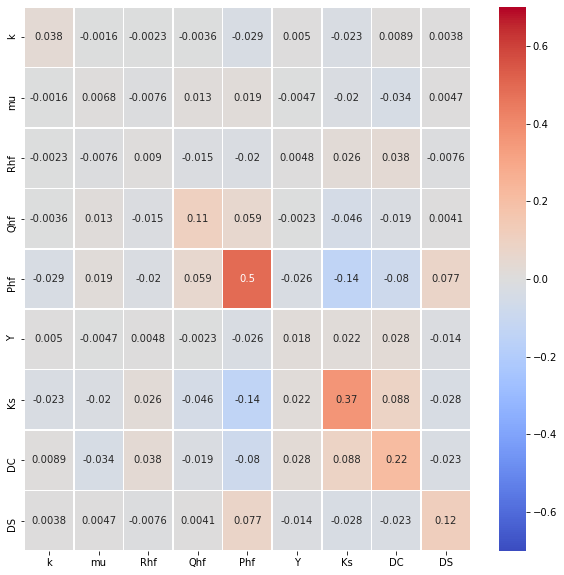

In [58]:
cutdat_ne = cutdat.drop("Error", axis=1)
cutdat_log = np.log10(cutdat_ne)
covmat = cutdat_log.cov()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(covmat, cmap ='coolwarm', vmin=-0.7, vmax=0.7, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

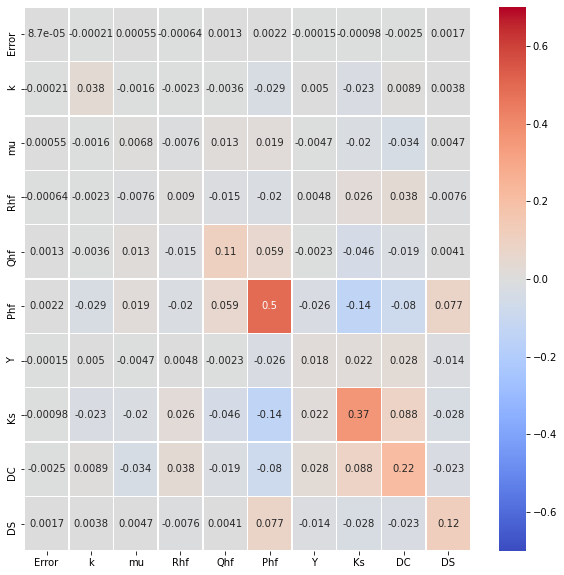

In [59]:
cutdat_ne = cutdat.drop("Error", axis=1)
cutdat_log = np.log10(cutdat)
covmat = cutdat_log.cov()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(covmat, cmap ='coolwarm', vmin=-0.7, vmax=0.7, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

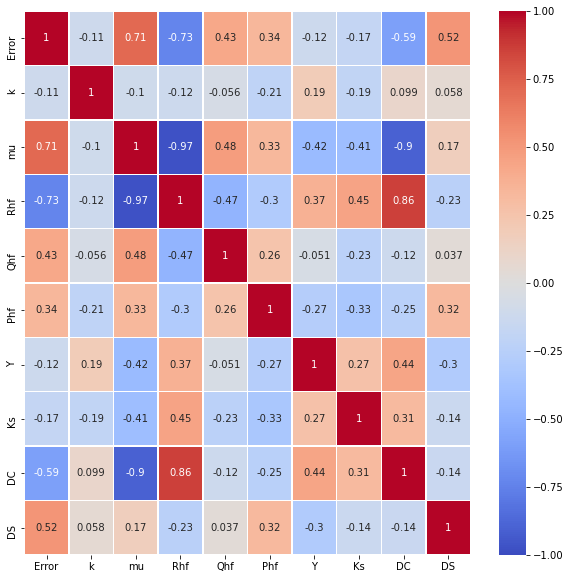

In [60]:
corrmat = cutdat_log.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmat, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

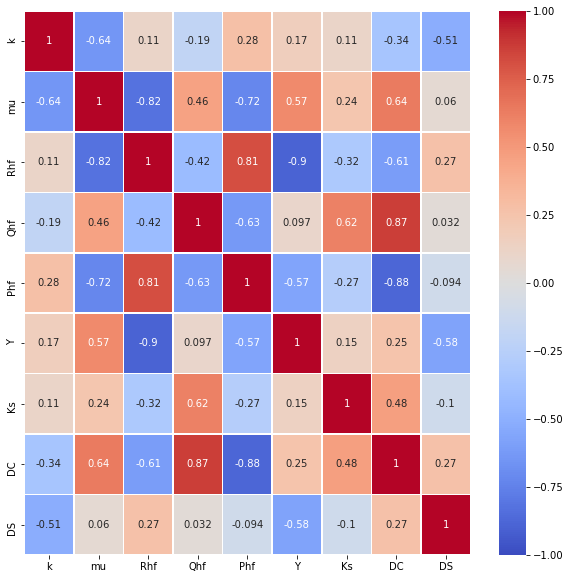

In [80]:
corrmat = cutdat_log.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmat, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

In [5]:
dat[dat.Error == min(dat.Error)]

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
70,42253.495606,0.984065,0.000321,7.322266,8.037921,4.056596,55.456763,0.000166,117655.09032,23.447679


In [61]:
cutdat

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
3,45485.060354,1.478141,0.000565,3.519998,18.082985,47.807168,58.743889,0.000039,8979.368597,18.369018
8,44390.336989,0.896412,0.000421,5.310237,4.374675,23.172183,51.924492,0.000382,16055.628739,25.154274
11,45849.926535,0.966273,0.000615,3.411876,9.566626,40.960432,48.116245,0.000125,3167.821110,34.825600
16,44330.643673,1.203820,0.000426,5.164442,4.052875,350.676489,47.623051,0.000085,19753.438089,38.729629
17,45420.723059,1.031431,0.000570,3.654164,17.542761,157.415146,54.238059,0.000091,6350.934299,23.304648
23,44995.659112,1.142456,0.000507,4.104407,1.765315,35.207331,51.939059,0.000106,5362.962605,27.805528
26,46151.705253,0.666567,0.000631,3.505568,25.247027,33.760309,51.507140,0.000098,4155.550186,27.218089
31,44131.144777,1.193663,0.000384,5.787767,9.834281,62.610285,95.059644,0.000044,48255.146010,3.033917
32,45913.470931,0.537898,0.000578,3.850530,5.703104,10.250021,52.858814,0.000259,3170.117965,30.371456
36,45517.375683,0.149723,0.000440,5.951258,12.351590,1523.159438,52.474847,0.000328,42667.798059,29.096047


          PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
k    0.111947 -0.628842 -0.061552  0.095611 -0.417470 -0.349403 -0.508692   
mu  -0.507205 -0.013850 -0.116650  0.131755  0.181642  0.074011 -0.028550   
Rhf  0.496616  0.223144  0.113048 -0.074377 -0.177149 -0.024533  0.162290   
Qhf -0.297955  0.012785  0.064329  0.717472 -0.229548 -0.290760  0.406912   
Phf -0.045638  0.436611  0.660711  0.238185 -0.009974 -0.039836 -0.553172   
Y    0.286950 -0.278500 -0.028905  0.517989  0.153757  0.728640 -0.117501   
Ks   0.269657  0.221458 -0.474944  0.290336  0.559247 -0.414853 -0.279814   
DC   0.482315  0.063790  0.080077  0.198180 -0.163111 -0.166220  0.312519   
DS   0.070997 -0.482810  0.544360 -0.067727  0.587833 -0.234652  0.229636   

          PC7       PC8  
k    0.064667 -0.140651  
mu   0.621040 -0.535358  
Rhf -0.158899 -0.775691  
Qhf -0.296344 -0.039041  
Phf  0.066255  0.044066  
Y   -0.044923 -0.023824  
Ks  -0.069530 -0.019606  
DC   0.695999  0.2851

Text(0.5, 0, 'Components')

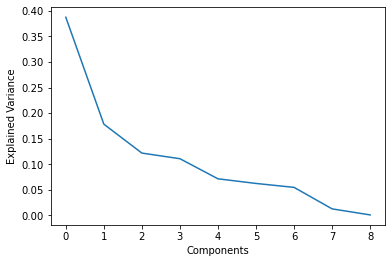

In [62]:
# You must normalize the data before applying the fit method
df_normalized=(cutdat_ne - cutdat_ne.mean()) / cutdat_ne.std()
pca = PCA(n_components=cutdat_ne.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=cutdat_ne.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')

In [63]:
pca = PCA()
components = pca.fit_transform(df_normalized)
labels = {
    str(i): f"PC {i} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)

<AxesSubplot:>

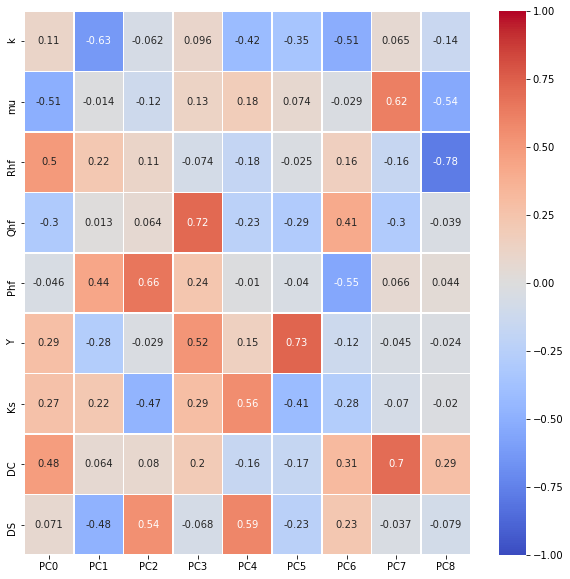

In [64]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(loadings, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:xlabel='Phf', ylabel='Error'>

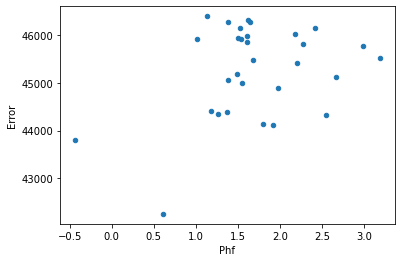

In [74]:
cutdat_log.plot.scatter(y='Error', x='hf')

In [65]:
cutdat_log['Error'] = 10**cutdat_log['Error'] 

In [75]:
p = np.array([1,2,3])

In [76]:
a, b, c = p

In [78]:
c

3